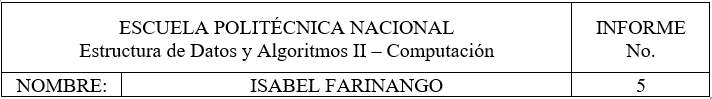

# ***EJERCICIOS DFS***

***1. OBJETIVOS*** 

* Aplicar el algoritmo DFS de forma manual y en código sobre los grafos proporcionados, así verificando la correcta construcción del árbol de recorrido mediante el seguimiento del orden de visita de nodos y la relación jerárquica entre padres e hijos, diferenciando entre aristas de árbol y de retroceso.

***2. INTRODUCCIÓN***

El algoritmo de búsqueda en profundidad (Depth-First Search o DFS) es una técnica fundamental en teoría de grafos que permite explorar sistemáticamente todos los nodos de un grafo. Este algoritmo se caracteriza por explorar tan profundamente como sea posible a lo largo de cada rama antes de retroceder, lo que lo diferencia de otros métodos de recorrido como BFS (Breadth-First Search). El DFS tiene aplicaciones prácticas en diversos campos de la computación, incluyendo la detección de ciclos, el ordenamiento topológico, la búsqueda de caminos, y la identificación de componentes conectados en grafos. 

Respecto a su implementación puede realizarse tanto de manera recursiva como iterativa mediante el uso de una pila, siendo ambas formas equivalentes en términos de funcionalidad pero con diferentes características de uso de memoria. La construcción del árbol DFS a partir de un grafo permite visualizar la estructura jerárquica del recorrido y comprender las relaciones padre-hijo entre los nodos visitados. Durante la ejecución del algoritmo, se mantiene un registro de nodos "parents" que indica, para cada nodo visitado, cuál fue el nodo desde el cual se llegó por primera vez. Este registro no solo facilita la reconstrucción del camino de exploración, sino que también permite identificar el componente conectado al que pertenece cada nodo, ya que todos los nodos alcanzables desde el nodo inicial comparten la misma raíz en el árbol DFS.

---

***3. PROBLEMAS PLANTEADOS Y SOLUCIÓN***

---

3.1. Genere el árbol DFS (DFS Tree) para el grafo G, sabiendo que el nodo de inicio es Start y el árbol se despliega gracias al registro de los nodos "parents". Ese sería el componente conectado que contiene al nodo Start. Implemente el algoritmo DFS (recursivo o con uso de pila) y use las estructuras auxiliares necesarias.

***Implementación a mano***

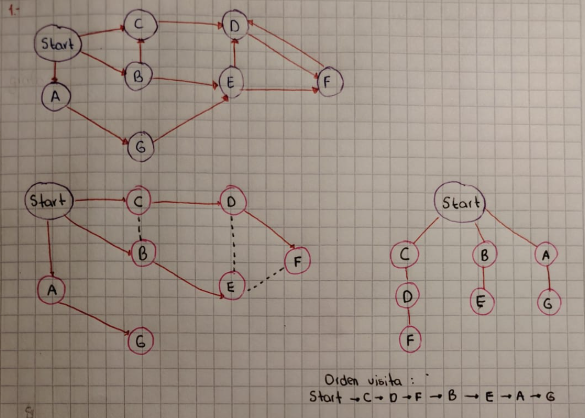

Pasos del algoritmo:

1. Comenzar en Start, vecinos: [C, B, A]
2. Ir a C (parent: Start), vecinos: [D]
3. Ir a D (parent: C), vecinos: [F]
4. Ir a F (parent: D), sin vecinos no visitados → retroceder
5. Volver a Start, ir a B (parent: Start), vecinos: [C✓, E]
6. Ir a E (parent: B), vecinos: [D✓, F✓] → retroceder
7. Volver a Start, ir a A (parent: Start), vecinos: [G]
8. Ir a G (parent: A) → Fin

---

***Implementación en código***

In [80]:
grafo_G = {
    'Start': ['C', 'B', 'A'],
    'A': ['G'],
    'B': ['C', 'E'],
    'C': ['D'],
    'D': ['F'],
    'E': ['D', 'F'],
    'F': [],
    'G': []
}

In [81]:
def dfs_tree(grafo, inicio):
    """
    Genera el árbol DFS mostrando el registro de parents.
    Retorna: diccionario de parents y orden de visita
    """
    visitados = set()
    parents = {}
    orden_visita = []
    
    def dfs_recursivo(nodo):
        visitados.add(nodo)
        orden_visita.append(nodo)
        print(f"Visitando: {nodo}")
        
        # Explorar vecinos en el orden dado
        for vecino in grafo[nodo]:
            if vecino not in visitados:
                parents[vecino] = nodo
                print(f"  → {vecino} tiene parent: {nodo}")
                dfs_recursivo(vecino)
    
    # Inicia DFS desde el nodo Start
    parents[inicio] = None
    dfs_recursivo(inicio)
    
    return parents, orden_visita


In [82]:
parents, orden = dfs_tree(grafo_G, 'Start')

print("\n REGISTRO DE PARENTS:")
for nodo in orden:
    parent = parents[nodo]
    if parent is None:
        print(f"  {nodo}: None (raíz)")
    else:
        print(f"  {nodo}: {parent}")

print(f"\n Orden de visita DFS: {' → '.join(orden)}")

Visitando: Start
  → C tiene parent: Start
Visitando: C
  → D tiene parent: C
Visitando: D
  → F tiene parent: D
Visitando: F
  → B tiene parent: Start
Visitando: B
  → E tiene parent: B
Visitando: E
  → A tiene parent: Start
Visitando: A
  → G tiene parent: A
Visitando: G

 REGISTRO DE PARENTS:
  Start: None (raíz)
  C: Start
  D: C
  F: D
  B: Start
  E: B
  A: Start
  G: A

 Orden de visita DFS: Start → C → D → F → B → E → A → G


In [83]:
print("\n ÁRBOL DFS (estructura):")
def imprimir_arbol(parents, raiz, prefijo="", es_ultimo=True):
    print(prefijo + ("└── " if es_ultimo else "├── ") + raiz)
    hijos = [nodo for nodo, parent in parents.items() if parent == raiz]
    for i, hijo in enumerate(hijos):
        es_ultimo_hijo = (i == len(hijos) - 1)
        nuevo_prefijo = prefijo + ("    " if es_ultimo else "│   ")
        imprimir_arbol(parents, hijo, nuevo_prefijo, es_ultimo_hijo)

imprimir_arbol(parents, 'Start', "", True)


 ÁRBOL DFS (estructura):
└── Start
    ├── C
    │   └── D
    │       └── F
    ├── B
    │   └── E
    └── A
        └── G


---

3.2. Pruebe su algoritmo con el ejemplo visto en clase para verificar el recorrido correcto de las ejecuciones DFS y cuál es el DFS tree.

***Implementación a mano***

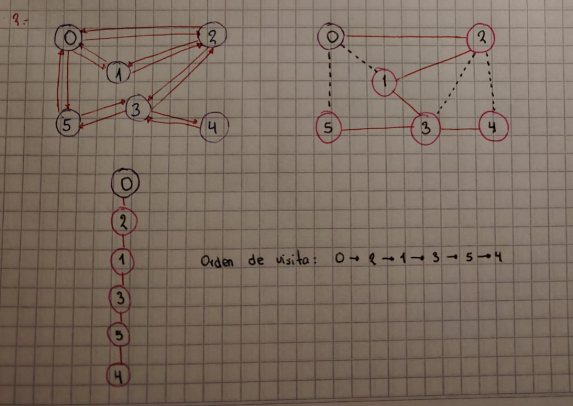

Pasos del algoritmo:
1. Comenzar en 0, vecinos: [2, 1, 5]
2. Ir a 2 (parent: 0), vecinos: [0✓, 1, 3, 4]
3. Ir a 1 (parent: 2), vecinos: [0✓, 2✓, 3]
4. Ir a 3 (parent: 1), vecinos: [1✓, 2✓, 5, 4]
5. Ir a 5 (parent: 3), vecinos: [0✓, 3✓, 4]
6. Ir a 4 (parent: 5), todos visitados → Fin

---

***Implementación en código***

In [84]:
grafo_2 = {
    0: [2, 1, 5],
    1: [0, 2, 3],
    2: [0, 1, 3, 4],
    3: [1, 2, 5, 4],
    4: [2, 3, 5],
    5: [0, 3, 4]
}
parents_2, orden_2 = dfs_tree(grafo_2, 0)

Visitando: 0
  → 2 tiene parent: 0
Visitando: 2
  → 1 tiene parent: 2
Visitando: 1
  → 3 tiene parent: 1
Visitando: 3
  → 5 tiene parent: 3
Visitando: 5
  → 4 tiene parent: 5
Visitando: 4


In [85]:
print("\n REGISTRO DE PARENTS:")
for nodo in orden_2:
    parent = parents_2[nodo]
    if parent is None:
        print(f"  {nodo}: None (raíz)")
    else:
        print(f"  {nodo}: {parent}")

print(f"\n Orden de visita DFS: {' → '.join(map(str, orden_2))}")

print("\n ÁRBOL DFS:")

def imprimir_arbol_numerico(parents, raiz, prefijo="", es_ultimo=True):
    print(prefijo + ("└── " if es_ultimo else "├── ") + str(raiz))
    hijos = [nodo for nodo, parent in parents.items() if parent == raiz]
    for i, hijo in enumerate(hijos):
        es_ultimo_hijo = (i == len(hijos) - 1)
        nuevo_prefijo = prefijo + ("    " if es_ultimo else "│   ")
        imprimir_arbol_numerico(parents, hijo, nuevo_prefijo, es_ultimo_hijo)

imprimir_arbol_numerico(parents_2, 0, "", True)


 REGISTRO DE PARENTS:
  0: None (raíz)
  2: 0
  1: 2
  3: 1
  5: 3
  4: 5

 Orden de visita DFS: 0 → 2 → 1 → 3 → 5 → 4

 ÁRBOL DFS:
└── 0
    └── 2
        └── 1
            └── 3
                └── 5
                    └── 4


---

***4. CONCLUSIONES***

* La implementación manual del algoritmo DFS permitió comprender en detalle el proceso de toma de decisiones en cada paso del recorrido, especialmente en momentos de retroceso cuando no existen vecinos sin visitar. El registro de parents resultó fundamental para mantener la trazabilidad del recorrido y para reconstruir el árbol DFS, donde cada nodo (excepto la raíz) tiene exactamente un padre.

***5. REFERENCIAS BIBLIOGRÁFICAS***

- *Recalde, L. (2025). Estructuras de Datos y Algoritmos II: Depth-first Search [Diapositivas de clase]. Escuela Politécnica Nacional, Computación.*

- *GeeksforGeeks. (2025, 25 de octubre). Depth First Search or DFS for a Graph. https://www.geeksforgeeks.org/dsa/depth-first-search-or-dfs-for-a-graph/*


***6. DECLARACIÓN DE USO DE IA Y PROMPTS*** 

*6.1	Herramienta utilizada:* Claude

*6.2	Propósito del uso:* Para verificar si estaba realizando bien uno de los ejercicios y también para consultar si sería necesario implementar una parte de código para que se muestre la estructura del grafo resultante

*6.3	Prompts o instrucciones proporcionadas:*

    *Los pasos de este algoritmo, representan bien a la gráfica hecha a mano?

    *Crees que en la implementación del código se vería mejor con una pequeña representación de la estructura del grafo resultante? 
  
link: https://claude.ai/share/aa3f0011-b03a-43b1-a9eb-05e9234f0384 

*6.4	Uso del contenido generado:* Solo para verificación y consulta de añadir algo más al código 

*6.5	Revisión y edición:* Ninguna, en la parte del código imprime la estructura

*6.6	Limitaciones y consideraciones éticas:*  Me ayudo para verificar y comprender de una forma más puntual acerca de DFS. 
